# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** any code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [48]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [3]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the size and shape features of different varieties of dry beans [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.muratkoklu.com/datasets/) [2]), shared in the public domain by the author).

Each sample describes the measurements of a bean of a single variety, and consists of following 16 features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Area`       | `float` | Area of the bean in pixels. |
| `Perimeter` | `float` | Bean circumference is defined as the length of its border. |
| `MajorAxisLength` | `float` | The distance between the ends of the longest line that can be drawn from a bean. |
| `MinorAxisLength` | `float` | The longest line that can be drawn from the bean while standing perpendicular to the main axis. |
| `AspectRatio` | `float` | The ratio between the major and minor axis length. |
| `Eccentricity` | `float` | Eccentricity of the ellipse having the same moments as the region. |
| `ConvexArea` | `int` | Number of pixels in the smallest convex polygon that can contain the area of a bean seed. |
| `EquivDiameter` | `float` | The diameter of a circle having the same area as a bean seed area. |
| `Extent` | `float` | The ratio of the pixels in the bounding box to the bean area. |
| `Solidity` | `float` | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. |
| `Roundness`| `float` | Measures the roundness of an object. |
| `Compactness` | `float` | An alternative measure of object roundness. |
| `ShapeFactor1` | `float` | Shape features according to [4] |
| `ShapeFactor2` | `float` | Shape features according to [4] |
| `ShapeFactor3` | `float` | Shape features according to [4] |
| `ShapeFactor4` | `float` | Shape features according to [4] |



The goal for the assessment is to predict the variety of bean, listed in the last column, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Class`  | `string`: class designation | The variety of dry bean. |


## Loading the dataset

The dataset is given in _beans.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Class'` field of the _.csv_ file.
- _Note_: The class in the `'Class'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

In [49]:
import numpy as np
import pandas as pd

#This code is based on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
################################
df = pd.read_csv("beans.csv")
print("In the dataset there are", len(df), "rows of data")
df = df.dropna()
print("And only", len(df), "rows after rows with empty values are removed")
df["Class"], class_mapping = pd.factorize(df["Class"])
################################


y = df['Class'].to_numpy(dtype=np.int64)
X = df.drop('Class', axis=1).to_numpy()
################################
print("The features and their datatypes in the dataset are\n",df.dtypes)
print("There are", len(np.unique(y)), "distinct classes")
df.info()

In the dataset there are 2900 rows of data
And only 2866 rows after rows with empty values are removed
The features and their datatypes in the dataset are
 Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRatio        float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object
There are 7 distinct classes
<class 'pandas.core.frame.DataFrame'>
Index: 2866 entries, 0 to 2899
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2866 non-null   int64  
 1   Perimeter        2866 non-null   float64
 2   MajorAxisLength  2866 non-null   float64
 3   Minor

**TESTING CELL**

In [50]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

The dataset has 2866 rows of valuable data present and has 17 Features present which gives a total of 48722 individual pieces of data. The last feature is the definitive class of the item and there are 7 distinct types of beans that can be classified within the dataset. There were initially 2900 rows of data so 34 rows of data have been removed. There are 2 different datatypes these being float and int however the specific type of int datatype is either int8 or int64 to save allocated memory. The dataset is by definition accurate to the classification due to the definitive nature of the Class feature. The total memory usage is 383.4 KiloBytes

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_pred`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [51]:
from sklearn.model_selection import train_test_split
################################
#### ADD YOUR SOLUTION HERE ####
################################

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)



**TESTING CELL**

In [52]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def model_accuracy(y_test, y_pred):
    
    return accuracy_score(y_test, y_pred)

model = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
y_pred = []
################################
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**TESTING CELL**

In [54]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_pred))

[5]
0.662020905923345


**ANSWER CELL**

_Write your answer here._

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- **Implement a function** `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision) calculated for every class. You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
def evaluate_model(model, X, y, y_test=None, y_pred=None, labels=None):
    print('Evaluating model...')
    scores = cross_val_score(model, X, y, cv=10)
    print("The raw Cross-Validation Scores are", scores)
    print("The mean Cross-Validation Score is", scores.mean())
    accuracy = accuracy_score(y_test, y_pred)
    print("The accuracy score is", accuracy)
    macroF1Score = f1_score(y_test, y_pred, average="macro")
    print("The macro F1 score is", macroF1Score)
    weightedF1Score = f1_score(y_test, y_pred, average="weighted")
    print("The weighted F1 score is", weightedF1Score)

    #Per Class
    precision = precision_score(y_test, y_pred, average=None)
    print("The precision scores per class are", precision)
    recall = recall_score(y_test, y_pred, average=None)
    print("The recall scores per class are", recall)
    f1PerClass = f1_score(y_test, y_pred, average=None)
    print("The F1 scorea per class are", f1PerClass)
    
    confusion = confusion_matrix(y_test, y_pred, normalize='true')
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=labels)
    cm_display.plot(cmap="viridis", xticks_rotation=45)
    plt.show()
    

**TESTING CELL**

Evaluating model...
The raw Cross-Validation Scores are [0.66202091 0.6271777  0.65505226 0.6445993  0.63763066 0.67595819
 0.68881119 0.68181818 0.67832168 0.68881119]
The mean Cross-Validation Score is 0.6640201262152482
The accuracy score is 0.662020905923345
The macro F1 score is 0.6321120627483751
The weighted F1 score is 0.6499141962489938
The precision scores per class are [0.5        1.         0.66197183 0.76315789 0.50847458 0.43137255
 0.62727273]
The recall scores per class are [0.34693878 1.         0.69117647 0.87437186 0.6122449  0.30555556
 0.59482759]
The F1 scorea per class are [0.40963855 1.         0.67625899 0.81498829 0.55555556 0.35772358
 0.61061947]


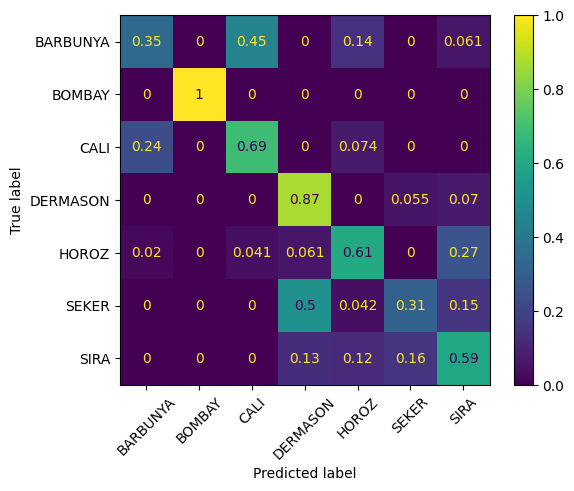

In [56]:
evaluate_model(model, X, y, y_test, y_pred, labels=class_mapping)

**ANSWER CELL**

_Write your answer here._

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [57]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] ####
model_1 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
model_2 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
model_3 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
################################
# model_1 = ...
# model_2 = ...
# model_3 = ...

**TESTING CELL**

In [58]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Evaluating model...


InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got <__main__.DummyClassifier object at 0x701a68b55670> instead.

**ANSWER CELL**

_Write your answer here._

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [12]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
#### Code  adapted from [2] ####
bagged_1 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
bagged_2 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
bagged_3 = type("DummyClassifier", (object, ), {"predict": lambda self, X: 0 })()
################################
# bagged_1 = ...
# bagged_2 = ...
# bagged_3 = ...

**TESTING CELL**

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

**ANSWER CELL**

_Write your answer here._

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

In [14]:
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

**ANSWER CELL**

_Write your answer here._

## References

[1] Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. _Computers and Electronics in Agriculture_, 174, p.105507.

[2] Murat Koklu: Dry Bean Dataset https://www.muratkoklu.com/datasets/ (accessed 14/08/2024)

[3] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[4] Pazoki, A.R., Farokhi, F. and Pazoki, Z., 2014. Classification of rice grain varieties using two artificial neural networks (MLP and neuro-fuzzy).